In [57]:
import polars as pl
import numpy as np
import math
from matplotlib import pyplot as plt

In [59]:
sample_input_path = 'inputs/train.parquet/partition_id=0/part-0.parquet'
sample_train_df = pl.read_parquet(sample_input_path)

print('mem', sample_train_df.estimated_size('gb'))
print(sample_train_df.columns)

print(sample_train_df.head(10))

sample_train_df.describe()

mem 0.6481935195624828
['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'featur

statistic,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1.94421e6,1.94421e6,1.94421e6,1.94421e6,0.0,0.0,0.0,0.0,0.0,1.94421e6,1.94421e6,1.94421e6,1.92723e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.889218e6,1.944147e6,1.934978e6,1.944151e6,1.944151e6,1.94421e6,0.0,1.94421e6,1.94421e6,1.94421e6,1.94421e6,0.0,0.0,1.94421e6,1.94421e6,1.94421e6,0.0,…,1.94192e6,1.88009e6,1.65109e6,1.94192e6,1.88009e6,1.944151e6,1.944151e6,1.922478e6,1.94421e6,1.94421e6,1.94421e6,1.790211e6,1.810936e6,1.807752e6,1.777836e6,1.777836e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.922478e6,1.922478e6,1.944194e6,1.944194e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6
"""null_count""",0.0,0.0,0.0,0.0,1.94421e6,1.94421e6,1.94421e6,1.94421e6,1.94421e6,0.0,0.0,0.0,16980.0,0.0,0.0,0.0,0.0,0.0,0.0,54992.0,63.0,9232.0,59.0,59.0,0.0,1.94421e6,0.0,0.0,0.0,0.0,1.94421e6,1.94421e6,0.0,0.0,0.0,1.94421e6,…,2290.0,64120.0,293120.0,2290.0,64120.0,59.0,59.0,21732.0,0.0,0.0,0.0,153999.0,133274.0,136458.0,166374.0,166374.0,0.0,0.0,0.0,0.0,0.0,0.0,21732.0,21732.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",93.846288,424.0,13.766376,1.973282,null,null,null,null,null,-0.044632,-0.006456,-0.019842,0.059797,28.628384,4.778166,168.016157,0.053623,0.03939,0.058634,0.331464,0.255926,0.32587,0.116747,0.034538,0.325885,null,0.429067,0.399052,-0.999268,0.196233,null,null,0.163988,-0.019372,0.381216,null,…,0.044491,0.118185,-0.092012,0.006591,-0.104968,-0.076846,-0.037126,-0.033732,-0.006372,-0.017632,-0.034067,0.649949,0.556831,0.580783,0.300181,0.231899,0.063448,0.037422,0.061478,0.04048,0.029071,0.048575,-0.118527,-0.120112,-0.083468,-0.084515,-0.096821,-0.098051,0.008425,0.010765,0.002413,0.011391,0.021855,0.003327,0.001488,-0.000482,0.001078
"""std""",48.131963,245.085082,11.087783,0.969197,null,null,null,null,null,0.947958,0.935119,0.967365,0.92284,23.910034,2.434048,174.221678,1.221367,1.301022,1.230007,1.105641,1.265235,1.173493,1.002713,1.038083,1.026575,null,0.943643,0.881062,0.734232,0.994776,null,null,0.937258,0.829064,1.08911,null,…,1.222116,1.045308,0.993687,1.225616,1.055472,1.024146,1.004834,0.979773,0.979413,0.98268,1.109674,2.686165,2.578012,2.651716,0.912934,0.908562,1.232994,1.317462,1.253779,1.243743,1.316291,1.270607,0.642401,0.6352,0.759618,0.754082,0.649495,0.639899,0.955878,1.141793,0.844203,1.276044,1.266448,1.225165,0.870577,0.891815,0.873732
"""min""",0.0,0.0,0.0,0.44057,null,null,null,null,null,-11.76608,-25.143543,-20.321791,-6.224619,4.0,1.0,11.0,-1.913078,-0.892107,-1.318024,-1.35983,-1.760566,-1.673085,-6.000734,-4.55074,-3.294369,null,-1.971631,-1.752133,-3.110884,-1.650518,null,null,-3.150075,-1.023257,-1.059913,null,…,-4.363397,-4.15804,-5.353856,-5.606056,-5.698468,-4.26841,-4.189552,-33.358139,-169.922882,-62.636726,-5.049103,-0.932498,-0.821984,-0.911218,-3.682407,-3.53722,-1.6

In [60]:
train_path = 'inputs/train.parquet/*/*.parquet'
train_df = pl.read_parquet(train_path)

print('mem: ', train_df.estimated_size('gb'))

train_df.describe()

mem:  15.637759508565068


statistic,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6827091e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.5918039e7,4.7127077e7,4.69255e7,4.7127112e7,4.7127112e7,4.7127338e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,…,4.7113533e7,4.608244e7,4.287324e7,4.7113533e7,4.608244e7,4.7127112e7,4.7127112e7,4.6648886e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6834511e7,4.6899772e7,4.6889675e7,4.6810175e7,4.6810175e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6643579e7,4.6643579e7,4.7068908e7,4.7068908e7,4.7107295e7,4.7107295e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7
"""null_count""",0.0,0.0,0.0,0.0,3.182052e6,3.182052e6,3.182052e6,3.182052e6,3.182052e6,0.0,0.0,0.0,300247.0,0.0,0.0,0.0,0.0,0.0,0.0,1.209299e6,261.0,201838.0,226.0,226.0,0.0,8.435985e6,0.0,0.0,0.0,0.0,8.435985e6,8.435985e6,0.0,0.0,0.0,8.435985e6,…,13805.0,1.044898e6,4.254098e6,13805.0,1.044898e6,226.0,226.0,478452.0,0.0,0.0,0.0,292827.0,227566.0,237663.0,317163.0,317163.0,0.0,0.0,0.0,0.0,0.0,0.0,483759.0,483759.0,58430.0,58430.0,20043.0,20043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1005.479389,468.705722,18.102394,2.009445,0.573833,0.010192,0.573102,0.572745,-0.000852,-0.03838,-0.005058,-0.013839,0.082467,32.762992,4.875799,170.69312,-0.038973,-0.026642,-0.041218,-0.251219,-0.20489,-0.242808,-0.008927,-0.031894,-0.209704,0.037687,0.067906,0.072203,0.572287,0.092576,-0.049244,-0.234434,-0.155543,-0.215313,-0.2576,0.036165,…,-0.097575,-0.103892,0.074961,0.048527,0.086814,-0.028328,0.027874,-0.015198,-0.002545,-0.00665,0.012388,-0.179578,-0.145254,-0.166556,-0.043152,-0.050118,-0.042604,-0.023995,-0.040502,-0.032992,-0.021157,-0.036682,-0.016559,-0.023103,-0.002237,-0.008022,-0.00659,-0.012559,-0.001545,-0.000866,-0.000142,-0.01638,-0.012442,-0.016624,-0.002141,0.001476,-0.001114
"""std""",445.181943,272.518697,11.301645,1.129388,1.327413,1.084941,1.32287,1.322849,1.037188,1.02012,1.065836,1.058633,0.973704,23.897102,3.036514,164.523054,0.93135,0.903511,0.927618,0.916496,0.891434,0.911261,1.035968,1.060218,0.905527,0.88762,0.979838,0.940164,1.449629,1.020206,1.059212,1.05812,1.038651,0.878222,0.927363,0.737381,…,0.92393,1.004431,1.036738,0.914435,0.999288,0.998483,1.03619,0.951424,0.94698,0.952109,1.112283,0.79263,0.718381,0.724299,1.04563,1.065957,0.915921,0.882024,0.907692,0.942279,0.886376,0.930929,0.966191,0.958618,0.956047,0.948959,0.949269,0.943592,0.591211,0.587551,0.599179,0.819231,0.87284,0.734546,0.889852,0.916042,0.864412
"""min""",0.0,0.0,0.0,0.149967,-5.794129,-5.741592,-5.72601,-5.60189,-5.79988,-25.350399,-58.604362,-39.085358,-15.566865,2.0,1.0,9.

In [61]:
# sample overtime step
train_path = 'inputs/train.parquet/*/*.parquet'
train_df = pl.scan_parquet(train_path)
filter = ((pl.col('time_id') >= 0) & (pl.col('time_id') < 100))
sample_df = train_df.filter(filter).collect()
print(sample_df.head(5))
# any cat column
columns_non_categorical = sample_df.to_pandas().select_dtypes(exclude='object').columns.to_list()
columns_non_categorical.sort()
columns_non_categorical


shape: (5, 92)
┌─────────┬─────────┬───────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ date_id ┆ time_id ┆ symbol_id ┆ weight   ┆ … ┆ responder_ ┆ responder_ ┆ responder_ ┆ responder_ │
│ ---     ┆ ---     ┆ ---       ┆ ---      ┆   ┆ 5          ┆ 6          ┆ 7          ┆ 8          │
│ i16     ┆ i16     ┆ i8        ┆ f32      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆         ┆           ┆          ┆   ┆ f32        ┆ f32        ┆ f32        ┆ f32        │
╞═════════╪═════════╪═══════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 0       ┆ 1         ┆ 3.889038 ┆ … ┆ 1.218368   ┆ 0.775981   ┆ 0.346999   ┆ 0.095504   │
│ 0       ┆ 0       ┆ 7         ┆ 1.370613 ┆ … ┆ 5.0        ┆ 0.703665   ┆ 0.216683   ┆ 0.778639   │
│ 0       ┆ 0       ┆ 9         ┆ 2.285698 ┆ … ┆ 0.099793   ┆ 2.109352   ┆ 0.670881   ┆ 0.772828   │
│ 0       ┆ 0       ┆ 10        ┆ 0.690606 ┆ … ┆ 1.225376   ┆ 1.114137   ┆ 0

['date_id',
 'feature_00',
 'feature_01',
 'feature_02',
 'feature_03',
 'feature_04',
 'feature_05',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65'

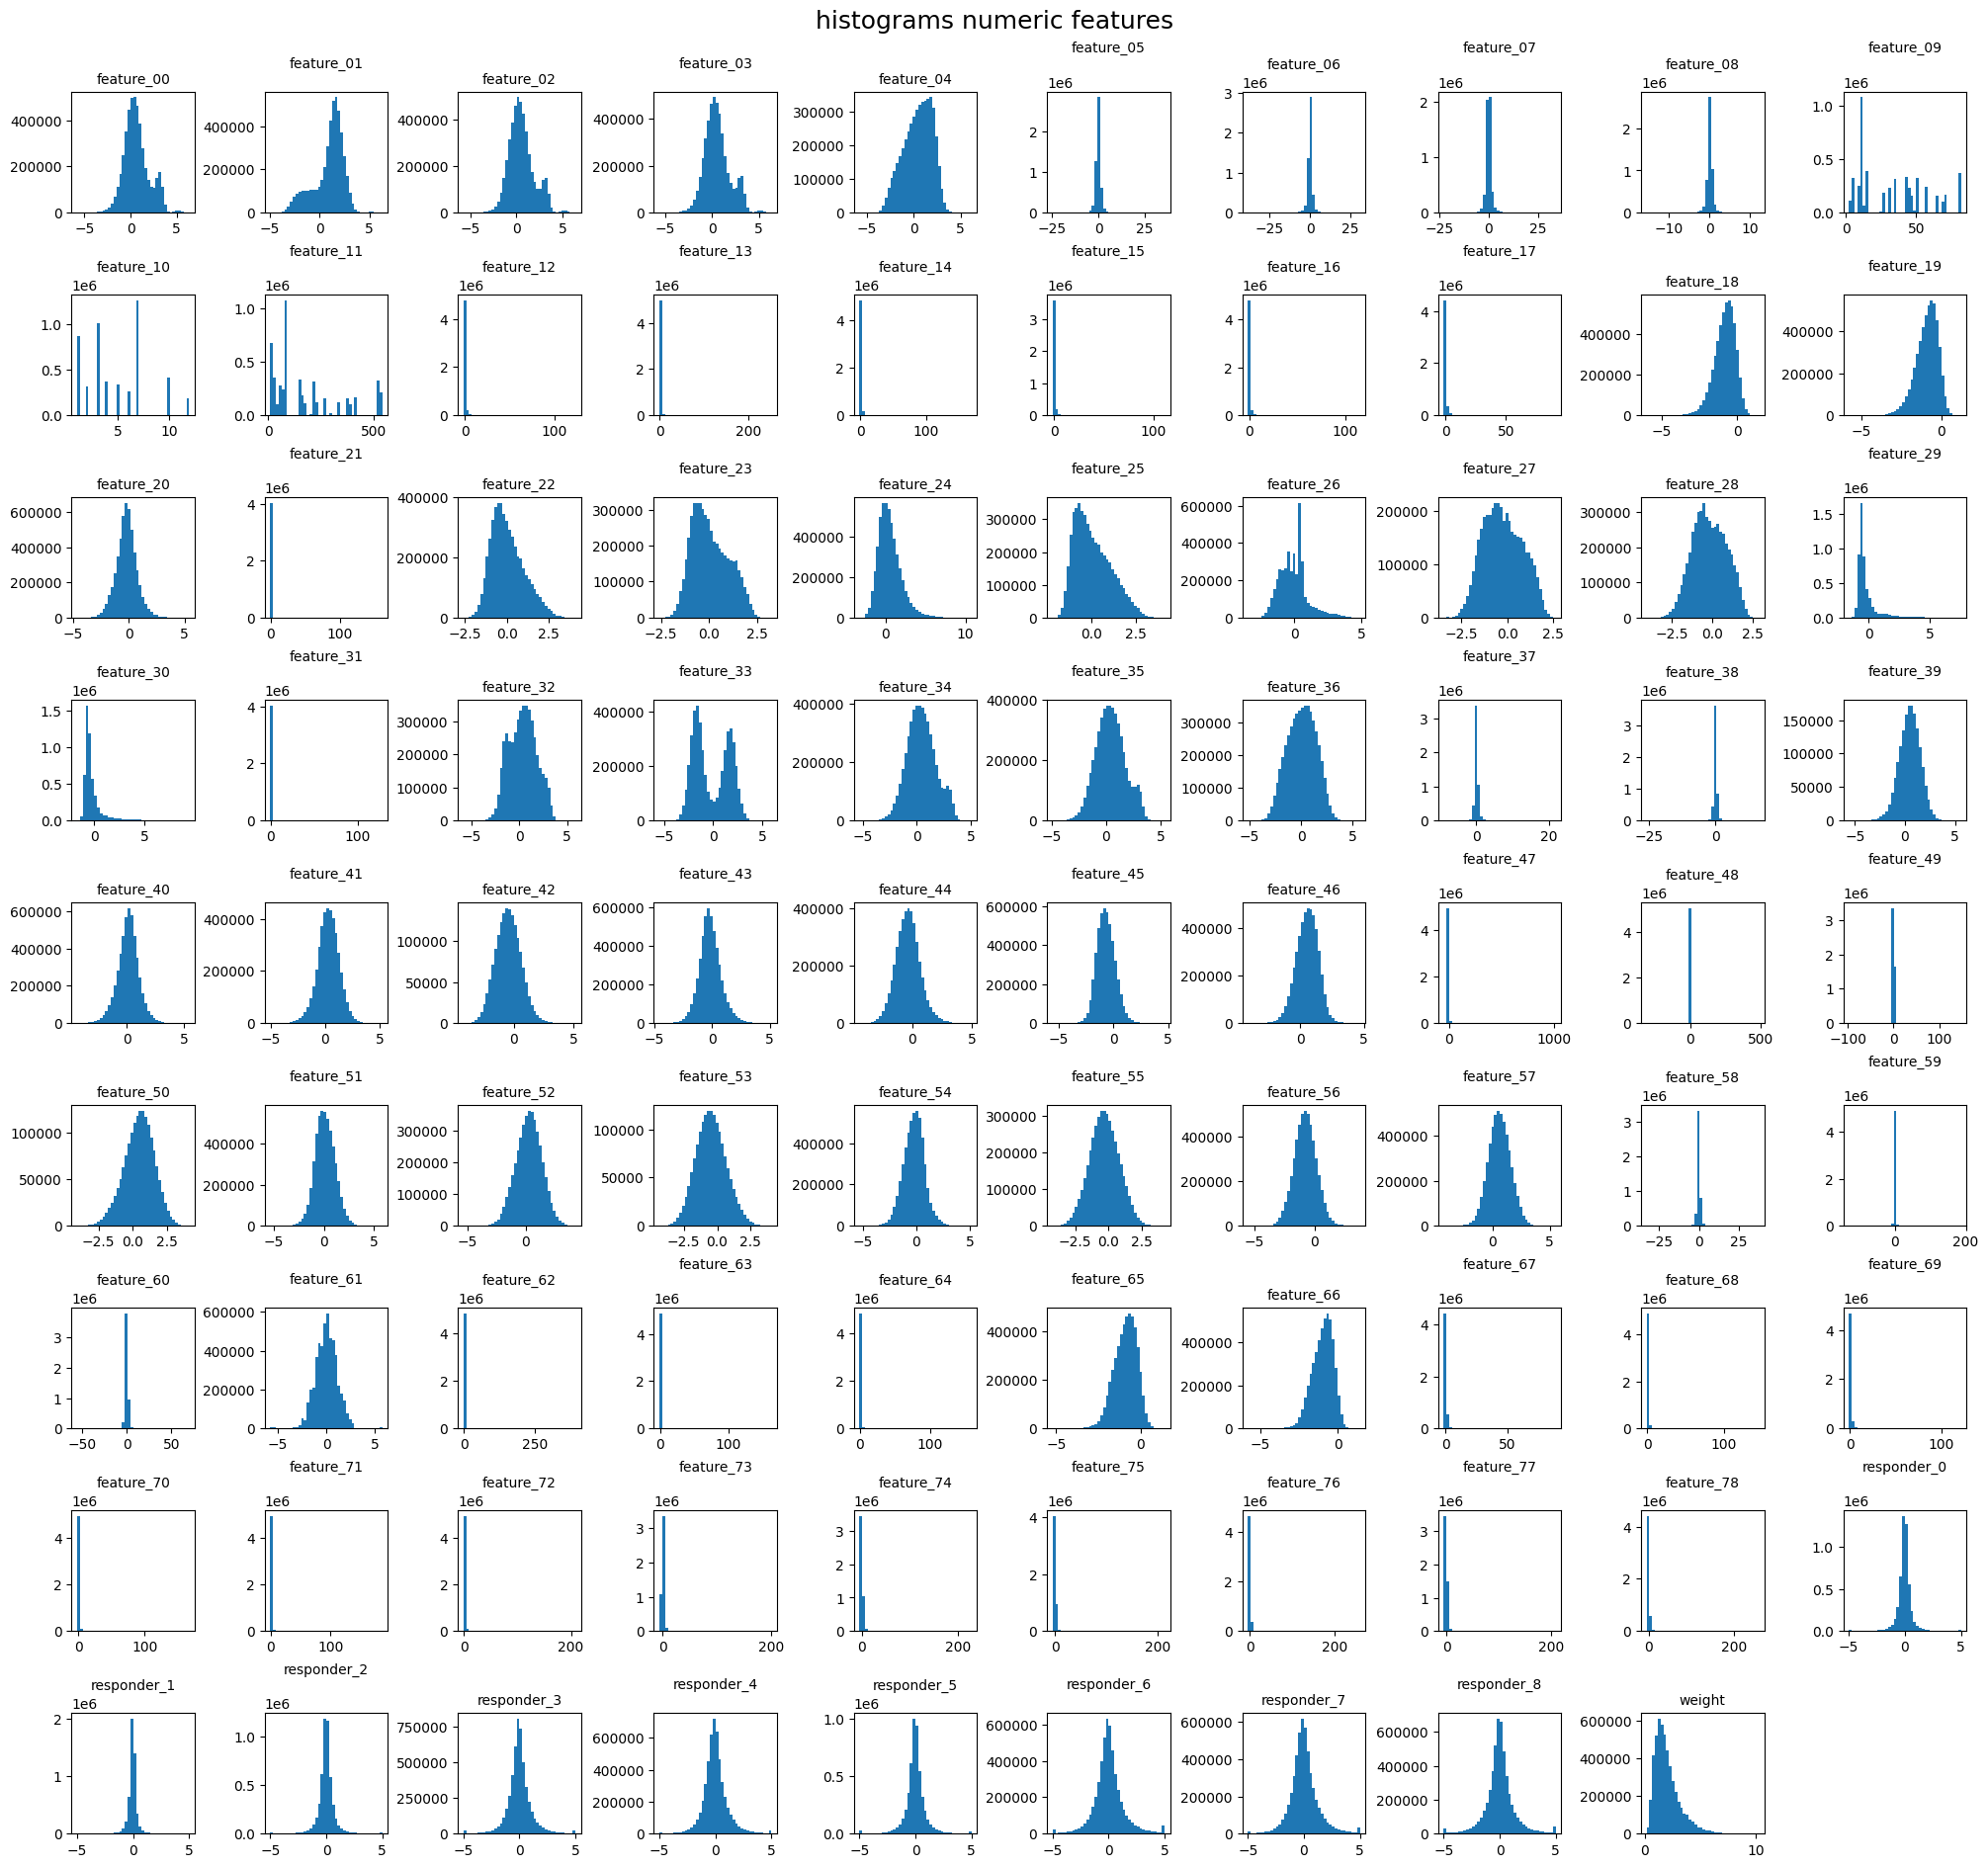

In [63]:
df = sample_df.to_pandas()

responder_cols = [x for x in df.columns if 'responder' in x]
ignore_cols = ['date_id','time_id','symbol_id']
# put responder cols last
numeric_cols = sorted(list(set(df.select_dtypes(exclude='object').columns) - set(ignore_cols) - set(responder_cols)) + responder_cols)

fig = plt.figure(figsize=(20, 20), layout="constrained")
fig.suptitle('histograms numeric features', fontsize=18)
grid_size = math.ceil(np.sqrt(len(numeric_cols)))

for i, item in enumerate(numeric_cols, 1):
    ax = plt.subplot(grid_size, grid_size, i)
    ax.hist(df[item], bins=40)
    ax_title = item
    if i % 2 == 0:
        ax_title += "\n"
    ax.set_title(ax_title)
    ax.title.set_fontsize(10)
plt.show()

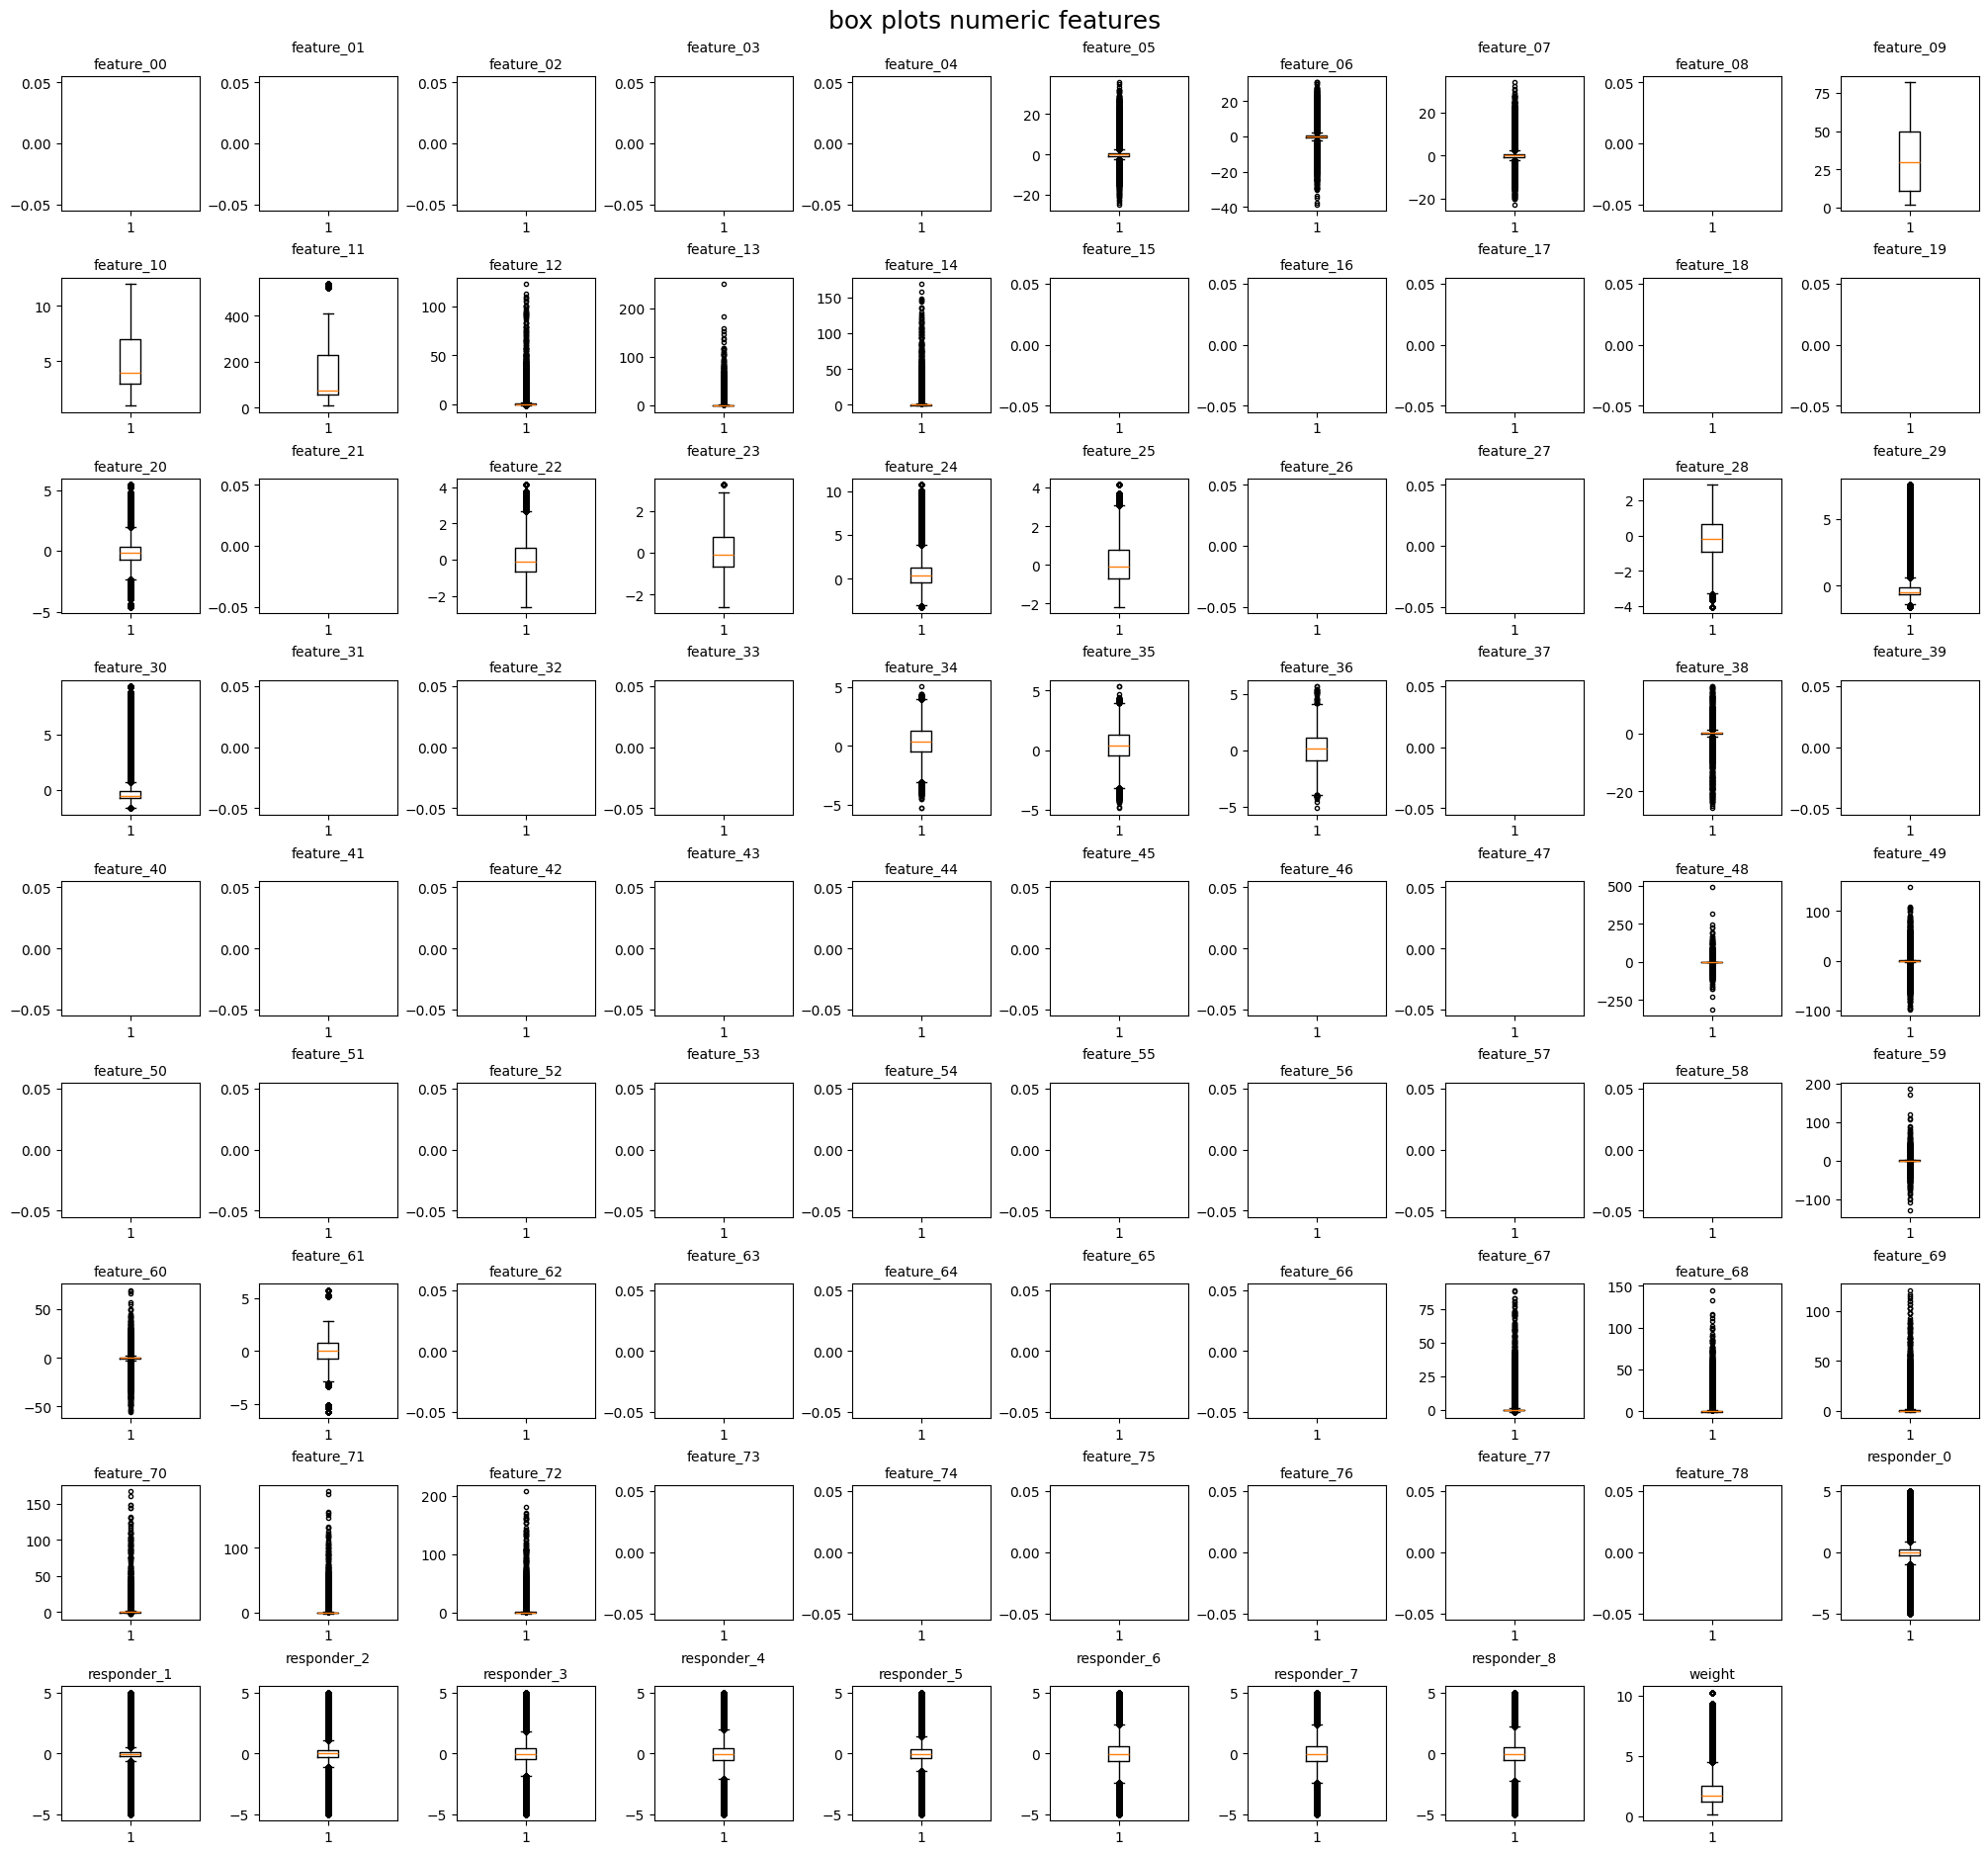

In [64]:
fig = plt.figure(figsize=(20, 20), layout="constrained")
fig.suptitle('box plots numeric features', fontsize=18)
grid_size = math.ceil(np.sqrt(len(numeric_cols)))
for i, item in enumerate(numeric_cols, 1):
    ax = plt.subplot(grid_size, grid_size, i)
    ax.boxplot(df[item], sym='.')
    ax_title = item
    if i % 2 == 0:
        ax_title += "\n"
    ax.set_title(ax_title)
    ax.title.set_fontsize(10)
plt.show()

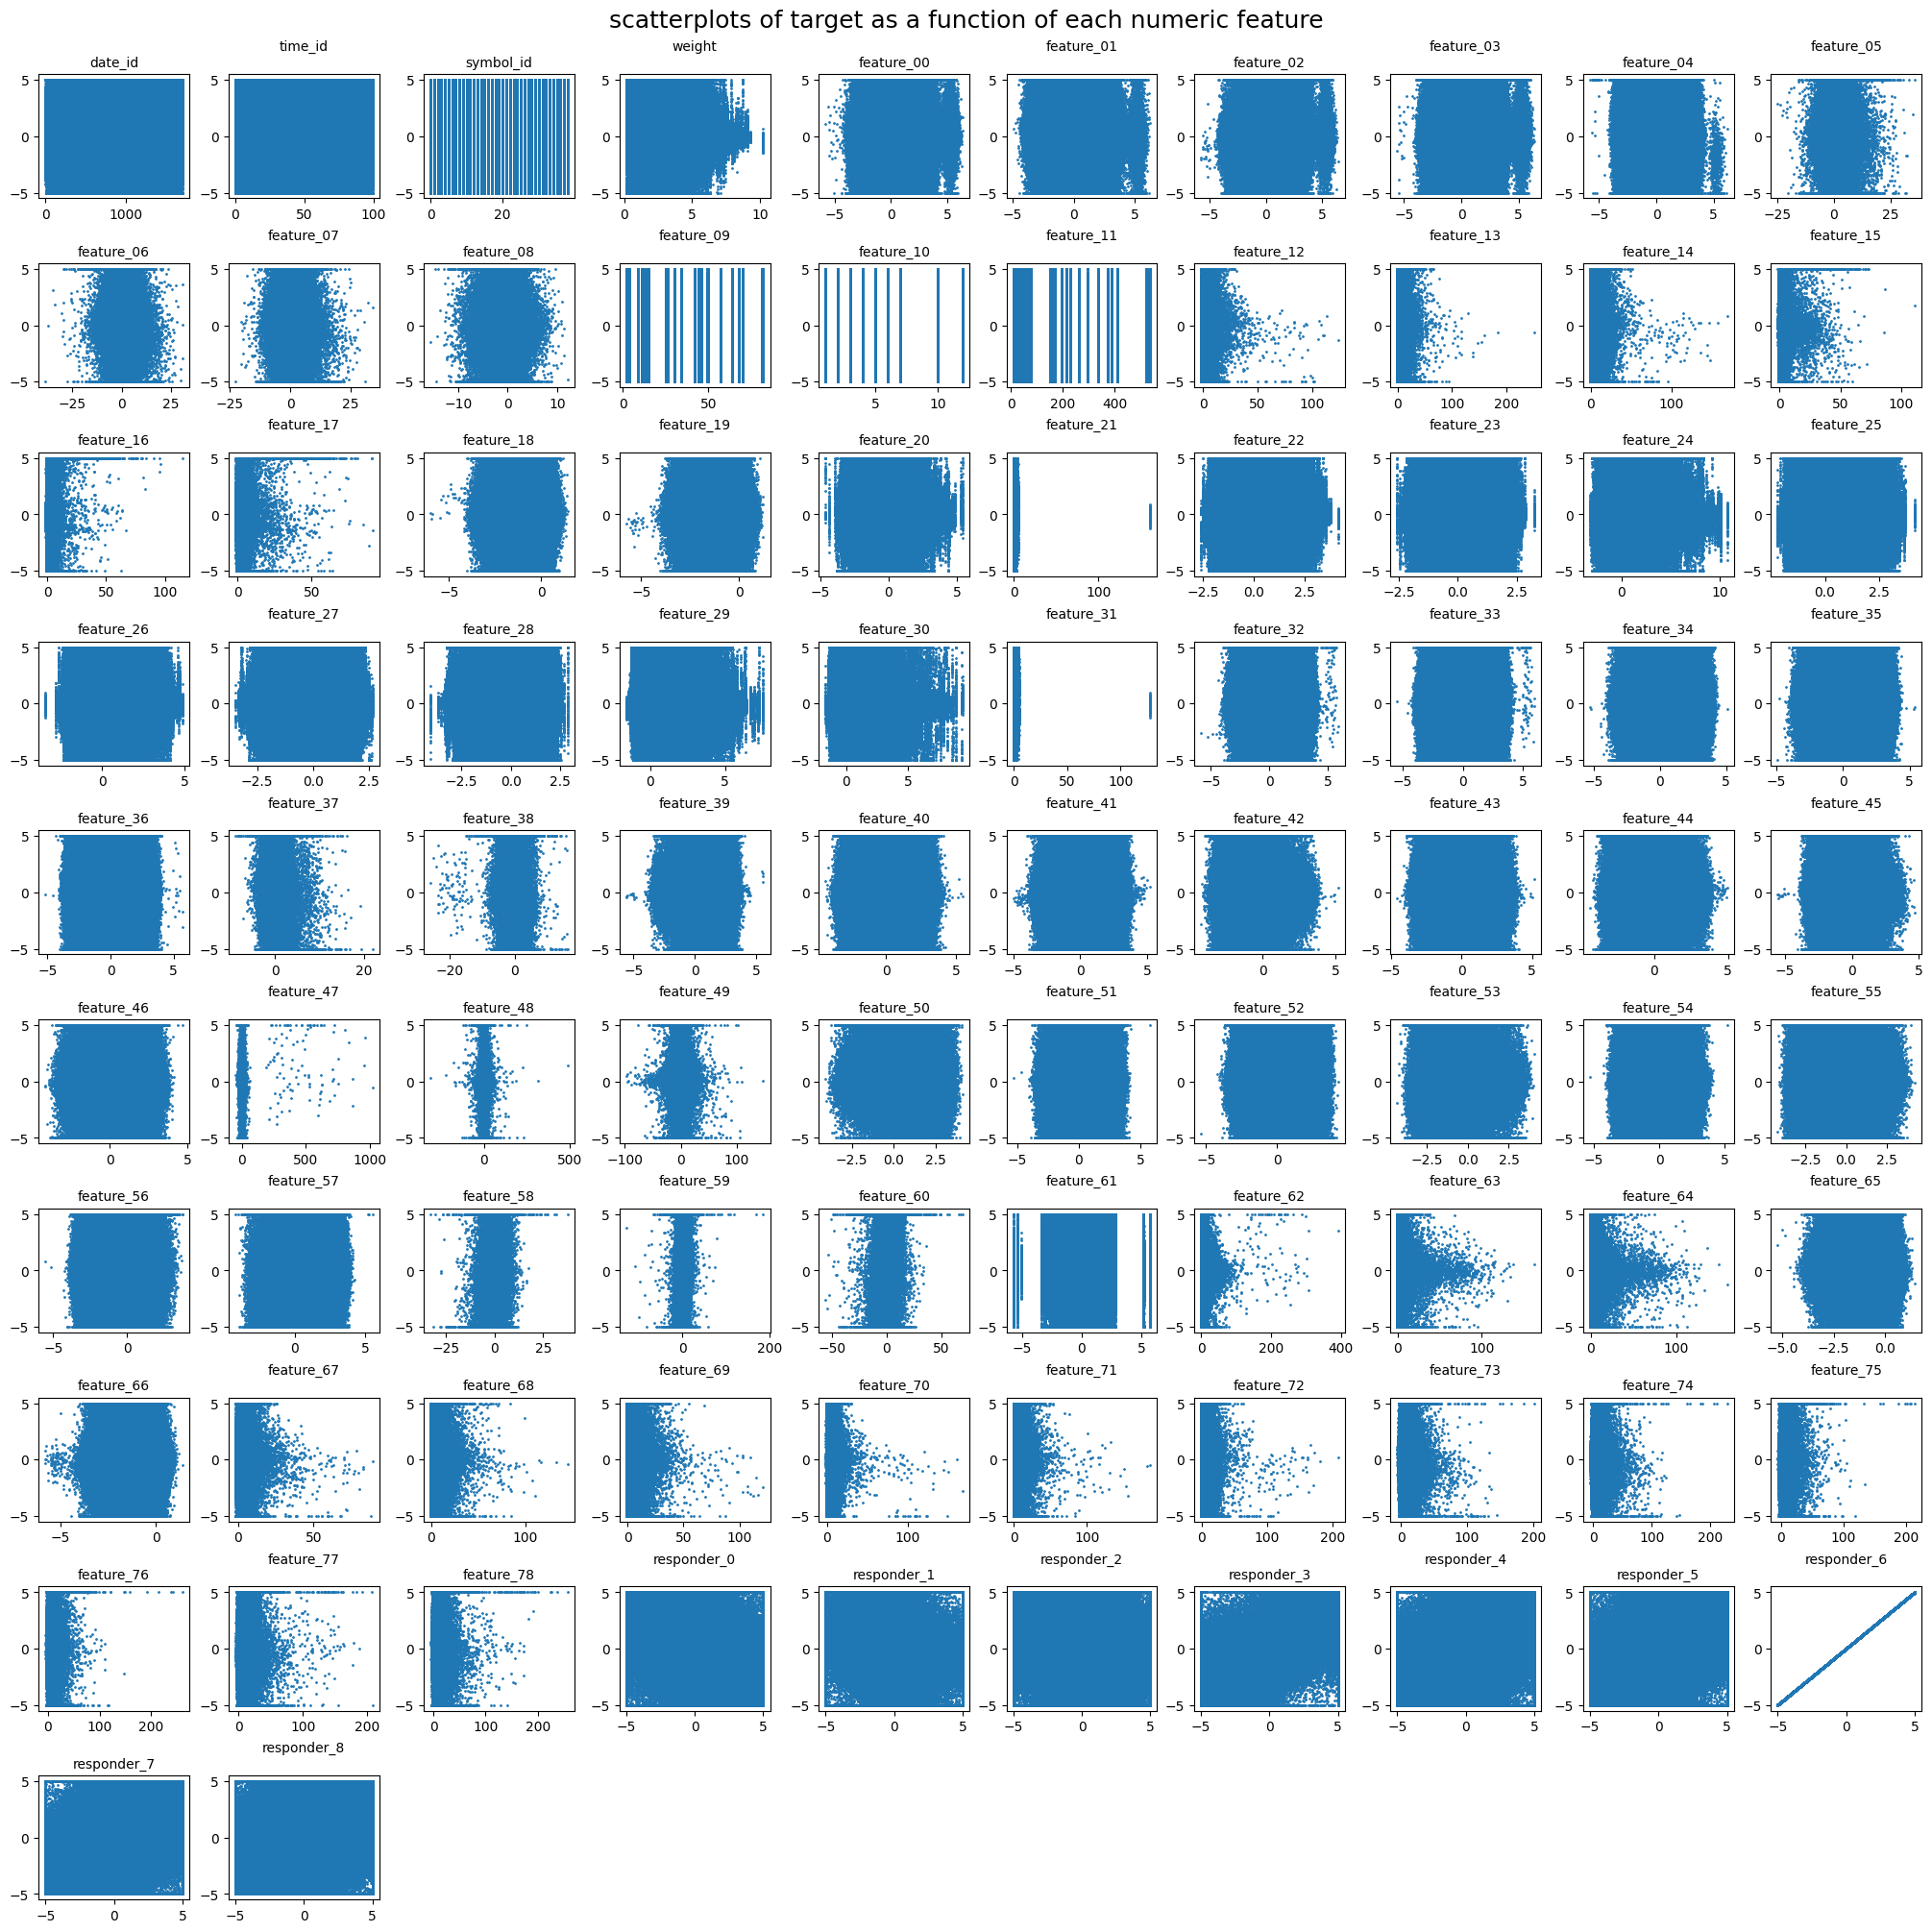

: 

In [65]:
fig = plt.figure(figsize=(20, 20), layout="constrained")
fig.suptitle(
    'scatterplots of target as a function of each numeric feature', fontsize=18
)
grid_size = math.ceil(np.sqrt(len(numeric_cols)))
for i, item in enumerate(
    [
        f
        for f in df.select_dtypes(exclude='object').columns
    ],
    1,
):
    ax = plt.subplot(grid_size, grid_size, i)
    ax_title = item
    if i % 2 == 0:
        ax_title += "\n"
    ax.set_title(ax_title)
    ax.title.set_fontsize(10)
    plt.scatter(df[item], df['responder_6'], s=1)
plt.show()

In [ ]:
_logs_feature = ['05','06','07','08','09','10','11','12','13','14','15','16','17','21',
'29','30','31','37','38','47','48','49','58','59','60','62','63','64','67','68','69',
'70','71','72','73','74','75','76','77','78']
logs_feature = [f'feature_{x}' for x in _logs_feature]

fig = plt.figure(figsize=(20, 20), layout="constrained")
fig.suptitle('box plots numeric features', fontsize=18)
grid_size = math.ceil(np.sqrt(len(logs_feature)))
for i, item in enumerate(logs_feature, 1):
    print(i, item)
    ax = plt.subplot(grid_size, grid_size, i)
    ax.hist(np.log1p(df[item]), bins=40)
    ax_title = item
    if i % 2 == 0:
        ax_title += "\n"
    ax.set_title(ax_title)
    ax.title.set_fontsize(10)
plt.show()

In [2]:
train_path = 'inputs/train.parquet/*/*.parquet'
scan_df = pl.scan_parquet(train_path)
# how many time steps?
times = scan_df.select(['time_id', 'date_id']).collect().describe()
times

statistic,time_id,date_id
str,f64,f64
"""count""",4.7127338e7,4.7127338e7
"""null_count""",0.0,0.0
"""mean""",468.705722,1005.479389
"""std""",272.518697,445.181943
"""min""",0.0,0.0
"""25%""",233.0,679.0
"""50%""",467.0,1060.0
"""75%""",701.0,1376.0
"""max""",967.0,1698.0


In [3]:
responder_cols = [x for x in scan_df.columns if 'responder' in x]
responder_df = scan_df.select(['time_id','date_id', 'symbol_id'] + responder_cols).collect()
responder_df

/var/folders/ml/yf_lhm0x73s8q_ybcf1d10k00000gn/T/ipykernel_25162/4107069285.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  responder_cols = [x for x in scan_df.columns if 'responder' in x]


time_id,date_id,symbol_id,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0
…,…,…,…,…,…,…,…,…,…,…,…
967,1698,34,0.243475,0.166927,0.38494,-0.174297,-0.066046,-0.038767,-0.132337,-0.022426,-0.252461
967,1698,35,0.850152,0.909382,1.015314,0.235962,0.122539,0.099559,-0.249584,-0.123571,-0.46063
967,1698,36,0.395684,-0.292574,-3.215846,-0.535129,-0.178484,-1.80815,-0.065355,-0.000367,-0.12517


<Axes: >

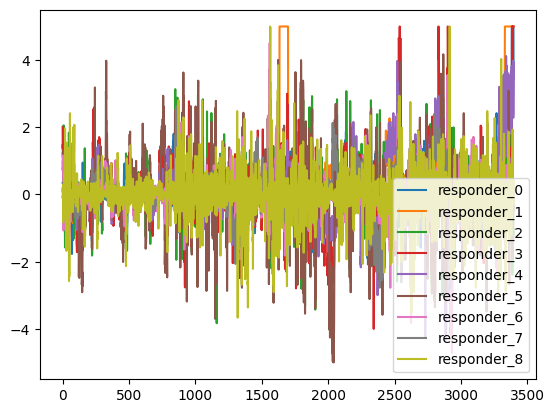

In [4]:
symbol_1 = responder_df.filter((pl.col('symbol_id') == 1) & (pl.col('date_id') <= 3)).sort(by=['date_id','time_id'])
symbol_1.to_pandas()[responder_cols].plot()

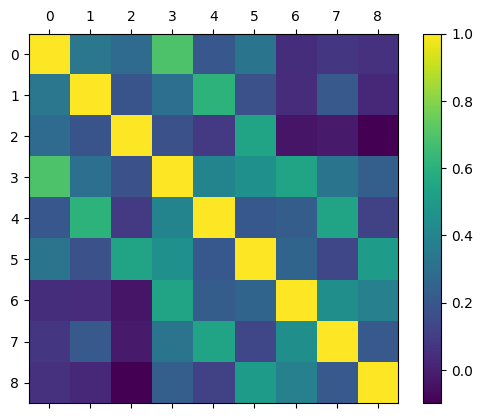

In [31]:
def pairwise_corr(df):
    return df.select(pl.corr(pl.all(),pl.col(c),method='spearman').name.suffix("|" + c) for c in df.columns).unpivot()

corr = pairwise_corr(symbol_1.select(responder_cols))['value'].to_numpy()
corr_np = corr.reshape((9,9))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_np, interpolation='nearest')
fig.colorbar(cax)

plt.show()

<Axes: xlabel='date_id'>

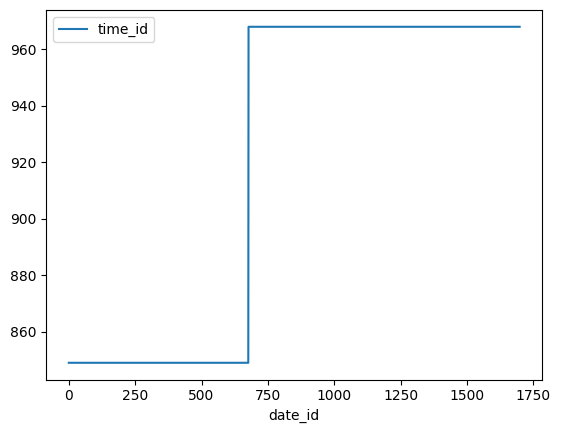

In [53]:
# investigate time_id and date_id
time_df = scan_df.select(['time_id','date_id']).collect()
count_time_steps_per_date = time_df.group_by(['date_id']).agg(pl.col("time_id").unique().len()).sort(by='date_id')
count_time_steps_per_date.to_pandas().plot(x='date_id')

In [55]:
test_df = pl.read_parquet('inputs/test.parquet/date_id=0/part-0.parquet')
test_df.columns

['row_id',
 'date_id',
 'time_id',
 'symbol_id',
 'weight',
 'is_scored',
 'feature_00',
 'feature_01',
 'feature_02',
 'feature_03',
 'feature_04',
 'feature_05',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_6

In [56]:
lag_df = pl.read_parquet('inputs/lags.parquet/date_id=0/part-0.parquet')
lag_df

date_id,time_id,symbol_id,responder_0_lag_1,responder_1_lag_1,responder_2_lag_1,responder_3_lag_1,responder_4_lag_1,responder_5_lag_1,responder_6_lag_1,responder_7_lag_1,responder_8_lag_1
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,0,-0.442215,-0.322407,0.143594,-0.92689,-0.782236,-0.036595,-1.305746,-0.795677,-0.143724
0,0,1,-0.651829,-1.70784,-0.893942,-1.065488,-1.871338,-0.615652,-1.162801,-1.205924,-1.245934
0,0,2,-0.656373,-0.264575,-0.892879,-1.511886,-1.03348,-0.378265,-1.57429,-1.863071,-0.027343
0,0,3,-0.188186,-0.19097,-0.70149,0.098453,-1.015506,-0.054984,0.329152,-0.965471,0.576635
0,0,4,-0.257462,-0.471325,-0.29742,0.074018,-0.324194,-0.597093,0.219856,-0.276356,-0.90479
…,…,…,…,…,…,…,…,…,…,…,…
0,0,34,-0.185392,-0.187891,-0.206658,-0.634903,-0.643175,-0.443875,-0.556474,-1.122211,-0.884185
0,0,35,-0.308923,-0.434147,-1.354941,0.30054,-0.830827,0.424937,0.518839,-0.687369,1.440577
0,0,36,-0.074661,-0.261698,-0.007051,-2.60039,-1.146709,-1.601274,-3.216254,-1.249338,-2.868875
